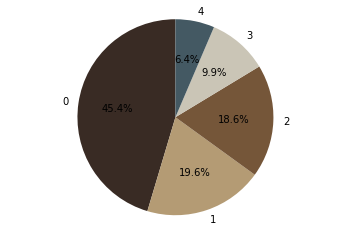

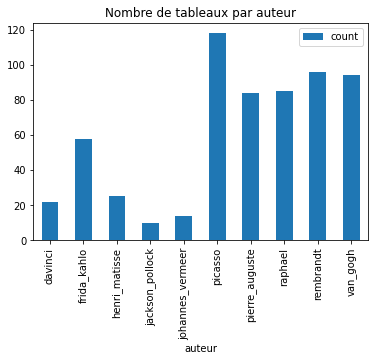

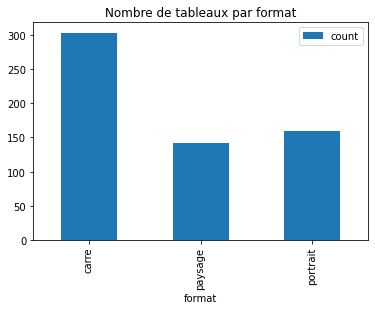

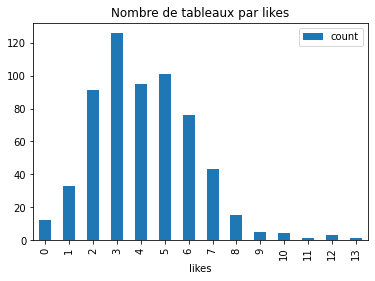

In [119]:
from pandas import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy
from sklearn.cluster import MiniBatchKMeans
import math

#ouverture des fichiers précédemment créés
with open("label.json",'r') as jsonTab:
    dataTab = json.load(jsonTab)
dataframeTab = json_normalize(dataTab)

with open("user.json",'r') as jsonUser:
    dataUser = json.load(jsonUser)
dataframeUser = json_normalize(dataUser)

arrayAuteur = []
arrayFormat = []
arrayLikes = []
arrayCouleur = []
for data in dataTab :
    arrayAuteur.append([data['auteur'],data['lien']])
    arrayFormat.append([data['format'],data['lien']])
    arrayLikes.append([data['likes'],data['lien']])
    arrayCouleur.append(data['couleur'])
dataframeAuteur = pd.DataFrame(arrayAuteur, columns=['auteur','lien'])
dataframeFormat = pd.DataFrame(arrayFormat, columns=['format','lien'])
dataframeLikes = pd.DataFrame(arrayLikes, columns=['likes','lien'])
couleursDom = pd.DataFrame(arrayCouleur, columns=['R','G','B'])


grouped=dataframeAuteur.groupby("auteur").count()
grouped = grouped.rename(
    columns={'lien':'count'}).reset_index()

grouped2 = dataframeFormat.groupby("format").count()
grouped2 = grouped2.rename(
    columns={'lien':'count'}).reset_index()

grouped3 = dataframeLikes.groupby("likes").count()
grouped3 = grouped3.rename(
    columns={'lien':'count'}).reset_index()

nbcluster = 5
clusters = MiniBatchKMeans(nbcluster).fit(couleursDom)
#création d'un numpyarray
npbins = numpy.arange(0, nbcluster + 1)
#création d'un histogramme qui classe les clusters par odre croissant
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

histogram[0][::-1].sort() #permet d'inverser le tri (ordre décroissant)

colors = []
for i in range(nbcluster):
    colors.append('#%02x%02x%02x' % (
    math.ceil(clusters.cluster_centers_[i][0]), 
        math.ceil(clusters.cluster_centers_[i][1]),
    math.ceil(clusters.cluster_centers_[i][2])))


fig1, ax1 = plt.subplots()
ax1.pie(histogram[0],labels=labels, autopct='%1.1f%%', startangle=90, colors=colors) #autopct permet d'avoir des pourcentages
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



grouped.plot(x=0, kind='bar', title="Nombre de tableaux par auteur")
grouped2.plot(x=0, kind='bar', title="Nombre de tableaux par format")
grouped3.plot(x=0, kind='bar', title="Nombre de tableaux par likes")
plt.show()

In [ ]:
from pandas import json_normalize
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy
from sklearn.cluster import MiniBatchKMeans
import math

#ouverture des fichiers précédemment créés
with open("label.json",'r') as jsonTab:
    dataTab = json.load(jsonTab)

with open("user.json",'r') as jsonUser:
    dataUser = json.load(jsonUser)


data=[]
result=[]
for lien in dataUser[0]["likes"]:
    for tableau in dataTab:
        if lien == tableau["lien"]:
            data.append([tableau["auteur"],tableau["format"],tableau["tags"]])
            result.append(1)

for lien in dataUser[0]["unlikes"]:
    for tableau in dataTab:
        if lien == tableau["lien"]:
            data.append([tableau["auteur"],tableau["format"],tableau["tags"]])
            result.append(0)


#generating numerical labels
le1 = LabelEncoder()
dataframe['color'] = le1.fit_transform(dataframe['color'])

le2 = LabelEncoder()
dataframe['tag'] = le2.fit_transform(dataframe['tag'])

le3 = LabelEncoder()
dataframe['size'] = le3.fit_transform(dataframe['size'])

le4 = LabelEncoder()
dataframe['mode'] = le4.fit_transform(dataframe['mode'])

le5 = LabelEncoder()
resultframe['favorite'] = le5.fit_transform(resultframe['favorite'])

#Use of random forest classifier
rfc = RandomForestClassifier(n_estimators=10, max_depth=2,
                  random_state=0)
rfc = rfc.fit(dataframe, resultframe.values.ravel())

#prediction
prediction = rfc.predict([
        [le1.transform(['red'])[0], le2.transform(['nature'])[0],
         le3.transform(['thumbnail'])[0], le4.transform(['portrait'])[0]]])
print(le5.inverse_transform(prediction))
print(rfc.feature_importances_)